<a href="https://colab.research.google.com/github/suryarisa113/PRATIKUM-1-G.231.21.0045/blob/main/pratikum2as.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('categorical columns : ',cat_col)
#numerical colimns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('numerical columns :',num_col)

categorical columns :  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
numerical columns : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [ ]:
df[cat_col].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [ ]:
df['Ticket'].unique()[:50]

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295'], dtype=object)

In [ ]:
df1 = df.drop(columns=['Name','Ticket'])
df1.shape

(891, 10)

In [ ]:
round((df1.isnull().sum()/df1.shape[0])*100,2)


PassengerId     0.00
Survived        0.00
Pclass          0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [ ]:
df2 = df1.drop(columns='Cabin')
df2.dropna(subset=['Embarked'], axis=0, inplace=True)
df2.shape

(889, 9)

In [ ]:
#Mean Imputation
df3 = df2.fillna(df2.Age.mean())
#let,s check the null calues again
df3.isnull().sum()

In [ ]:
#calculate summary satistics
mean = df3['Age'].mean()
std  = df3['Age'].std()
#calculate the lower and upper bounds
lower_bound = mean - std*2
upper_bound = mean + std*2
print('Lower Bound :',lower_bound)
print('upper bound :',upper_bound)
#drop the outliners
df4 = df3[(df3['Age'] >=lower_bound)&(df3['Age']<= upper_bound)]

NameError: ignored

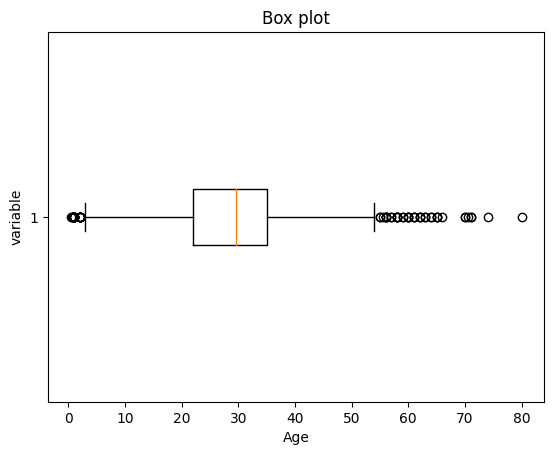

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(df3['Age'], vert=False)
plt.ylabel('variable')
plt.xlabel('Age')
plt.title('Box plot')
plt.show()

In [ ]:
x = df3[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y = df3['Survived']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#initialising the MinMAxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
#numerical columns
num_col_ = [col for col in x.columns if x[col].dtype !='object']
x1 = x
#learning the statistical parameters for each of the data and trasforming
x1[num_col_] = scaler.fit_transform(x1[num_col_])
x1.head


<ipython-input-38-672629162e59>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1[num_col_] = scaler.fit_transform(x1[num_col_])


<bound method NDFrame.head of      Pclass     Sex       Age  SibSp     Parch      Fare Embarked
0       1.0    male  0.271174  0.125  0.000000  0.014151        S
1       0.0  female  0.472229  0.125  0.000000  0.139136        C
2       1.0  female  0.321438  0.000  0.000000  0.015469        S
3       0.0  female  0.434531  0.125  0.000000  0.103644        S
4       1.0    male  0.434531  0.000  0.000000  0.015713        S
..      ...     ...       ...    ...       ...       ...      ...
886     0.5    male  0.334004  0.000  0.000000  0.025374        S
887     0.0  female  0.233476  0.000  0.000000  0.058556        S
888     1.0  female  0.367204  0.125  0.333333  0.045771        S
889     0.0    male  0.321438  0.000  0.000000  0.058556        C
890     1.0    male  0.396833  0.000  0.000000  0.015127        Q

[889 rows x 7 columns]>

In [ ]:
#import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

from google.colab import files
uploaded = files.upload()


Saving creditcard.csv to creditcard.csv


In [ ]:
#load the data set
data = pd.read_csv('creditcard.csv')

#print info the amount column
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                                                                                --------------  ----- 
 0   Time,"V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28","Amount","Class"  999 non-null    object
dtypes: object(1)
memory usage: 7.9+ KB
None


In [ ]:
#normalise the amount column
data['normAmount'] = scaler.fit_transform(np.array(data['Amount']).reshape(-1, 1))


#drop Time anda Amount columns as they are not relevant for prediction purpose
data = data.drop(['Time','Amount'], axis=1)

#as you can see there are 493 fraund transaction.
data ['Class'].value_counts()

KeyError: ignored